# <center>PIPELINE</center>

# 1. Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plots import *
%matplotlib inline

# 2. Load Datasets

In [2]:
import load_datasets

In [5]:
load_datasets.load_covid().head()

In [ ]:
load_datasets.load_IPA().head()

In [ ]:
load_datasets.load_cfc_2020().head()

In [ ]:
load_datasets.load_cfm_2020().head()

In [5]:
load_datasets.load_cfm_all_years().head()

In [3]:
load_datasets.load_mean_daily_deaths_2020().head()

,mean_daily_deaths
codmun,
110001,0.065574
110002,0.503759
110003,0.028436
110004,0.231707
110005,0.035874


# 3. Categorize IPA

In [3]:
df_ipa = load_datasets.load_IPA()

In [4]:
bol_ipa_low = df_ipa['taxa'] < 10
bol_ipa_med = (df_ipa['taxa'] >= 10) & (df_ipa['taxa'] < 50)
bol_ipa_hig = df_ipa['taxa'] >= 50

In [5]:
# creating risk column with np.nan values
df_ipa['risk'] = np.array([np.nan] * df_ipa.shape[0])

In [6]:
df_ipa_risk = pd.concat(
    [df_ipa[bol_ipa_low][['no_cidade', 'taxa', 'risk']].fillna('low'),
     df_ipa[bol_ipa_med][['no_cidade', 'taxa', 'risk']].fillna('medium'),
     df_ipa[bol_ipa_hig][['no_cidade', 'taxa', 'risk']].fillna('hight')],
    axis=0).sort_index(ascending=True)

df_ipa_risk.rename(columns={'no_cidade': 'municipio'}, inplace=True)

In [7]:
try:
    del df_ipa
    del bol_ipa_low
    del bol_ipa_med
    del bol_ipa_hig
except NameError as e:
    print(e)

In [14]:
# df_ipa_risk.head(20)

# 4. Join CFC with IPA

In [11]:
df_cfc_2020 = load_datasets.load_cfc_2020()

In [12]:
df_covid = load_datasets.load_covid()

In [43]:
# df_covid

In [13]:
df_cfc_2020_with_city = df_cfc_2020.join(df_covid[['municipio', 'regiao']]).reset_index().drop_duplicates(subset=['codmun'])

In [15]:
try:
    df_ipa_risk.set_index('municipio', inplace=True)
except KeyError as e:
    print('ipa:\t\t', e)

try:
    df_cfc_2020_with_city.set_index('municipio', inplace=True)
except KeyError as e:
    print('cfc 2020:\t', e)

ipa:		 "None of ['municipio'] are in the columns"
cfc 2020:	 "None of ['municipio'] are in the columns"


In [16]:
df_ipa_risk_cfc_2020_with_city_duplicate = df_ipa_risk.join(df_cfc_2020_with_city, how='inner')

In [17]:
df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false = df_ipa_risk_cfc_2020_with_city_duplicate.reset_index().drop_duplicates(
    subset=['municipio'], keep=False).set_index('municipio')

In [137]:
# df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false

In [15]:
msg = 'already deleted ->'

try:
    del df_covid
except NameError as e:
    print(msg, e)
    
try:
    del df_cfc_2020
except NameError as e:
    print(msg, e)
# try:
#     del df_ipa_risk
# except NameError as e:
#     print(msg, e)

del msg

# 5. IPA analysis

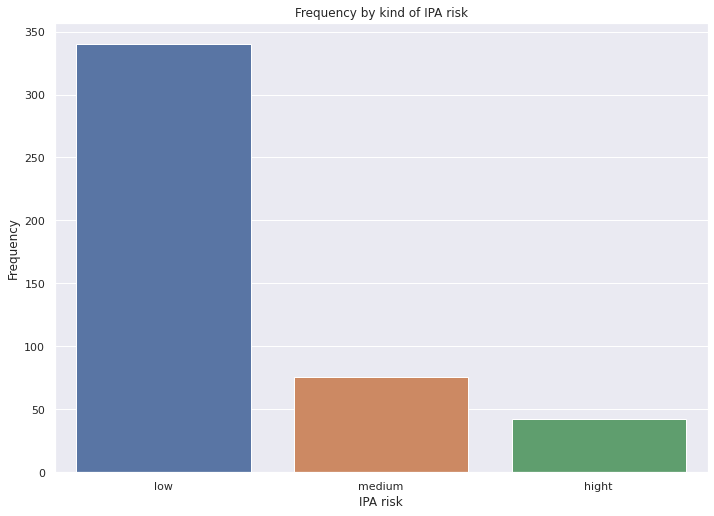

In [351]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot = countplot(df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false, x='risk')

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'ipa_countplot.png'

plt.title('Frequency by kind of IPA risk')
plt.xlabel('IPA risk')
plt.ylabel('Frequency')

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

In [22]:
df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false[['risk']].value_counts()

risk  
low       340
medium     76
hight      42
dtype: int64

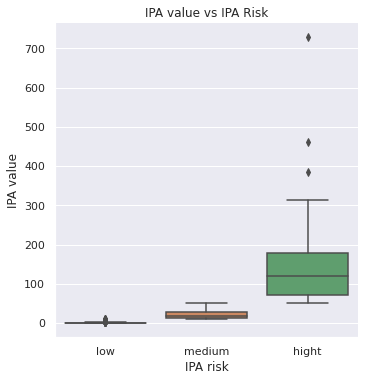

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot = catplot(df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false[['risk', 'taxa']],
       x='risk', y='taxa', kind='box')

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'ipa_catplot_boxplot.png'

plt.title('IPA value vs IPA Risk')
plt.xlabel('IPA risk')
plt.ylabel('IPA value')

plt.show()

plot.savefig(
    os.path.join(path_output, file_output), dpi=300)

In [24]:
df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false.describe()

,taxa,CFC_DEATHS,CFC_BEDS
count,458.000000,458.000000,458.000000
mean,18.487074,0.000658,0.001592
std,57.896840,0.000420,0.001130
min,0.000000,0.000000,0.000000
25%,0.090000,0.000336,0.000868
50%,0.585000,0.000609,0.001456
75%,10.735000,0.000891,0.002176
max,728.620000,0.002766,0.007976


# 6. Correlaction between IPA an CFC

Text(0.5, 1.0, 'spearman correlaction')

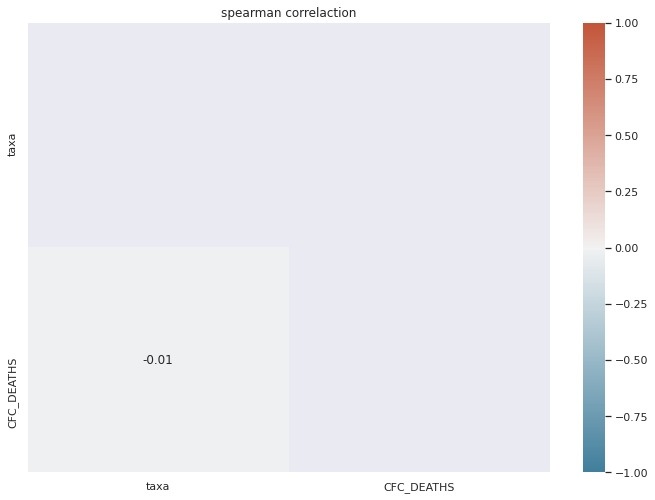

In [25]:
corr = df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false[['taxa', 'CFC_DEATHS']].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)
plt.title('spearman correlaction')

# 7. compare IPA risk with CFC

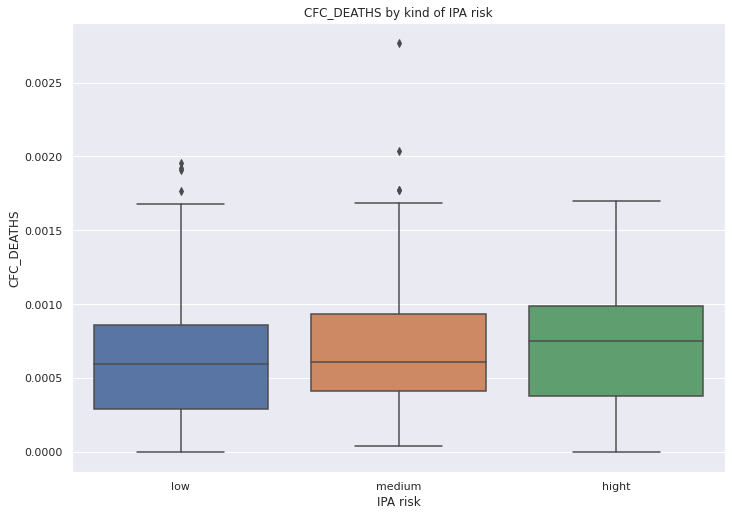

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot = boxplot(df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false,
        x='risk',
        y='CFC_DEATHS')

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'CFC_DEATHS_by_IPA_risk.png'

plt.title('CFC_DEATHS by kind of IPA risk')
plt.xlabel('IPA risk')
plt.ylabel('CFC_DEATHS')

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

In [249]:
# boxplot(df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false,
#         x='risk',
#         y='CFC_BEDS')

# 7. Check CFC outside malaria cities

In [28]:
df_cfc_2020 = load_datasets.load_cfc_2020()

In [191]:
# df_cfc_2020

In [29]:
bol_cfc_outside_mal = ~df_cfc_2020.index.isin(df_ipa_risk_cfc_2020_with_city_duplicate['codmun'])

In [30]:
df_cfc_2020[bol_cfc_outside_mal].describe()

,CFC_DEATHS,CFC_BEDS
count,5022.000000,5022.000000
mean,0.000563,0.001523
std,0.000432,0.001990
min,0.000000,0.000000
25%,0.000242,0.000000
50%,0.000492,0.001094
75%,0.000802,0.002322
max,0.003507,0.030565


In [32]:
# boxplot(df_cfc_2020[bol_cfc_outside_mal],        
#         y='CFC_DEATHS')

In [245]:
# boxplot(df_cfc_2020[bol_cfc_outside_mal],        
#         y='CFC_BEDS')

# 8. Compare IPA risk with Mean Daily Deaths by COVID-19

In [33]:
df_mean_daily_deaths_covid_2020 = load_datasets.load_mean_daily_deaths_2020()

In [54]:
df_ipa_cfc_2020_cfm_all_years = df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false.set_index('codmun').join(load_datasets.load_cfm_all_years()).dropna()
df_ipa_cfc_2020_cfm_all_years

,taxa,risk,CFC_DEATHS,CFC_BEDS,regiao,CFM
codmun,,,,,,
150010,0.06,low,0.000761,0.001782,Norte,0.005010
150013,0.58,low,0.000269,0.002825,Norte,0.006188
150020,0.24,low,0.000288,0.000594,Norte,0.000738
120001,4.54,low,0.000787,0.001049,Norte,0.416561
150030,24.42,medium,0.000280,0.000765,Norte,0.342044
...,...,...,...,...,...,...
172210,0.08,low,0.001300,0.002426,Norte,0.015425
150840,0.04,low,0.000581,0.002659,Norte,0.010078
211400,1.29,low,0.000754,0.001470,Nordeste,0.038442


In [55]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths = df_ipa_cfc_2020_cfm_all_years.join(df_mean_daily_deaths_covid_2020)

In [57]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths

,taxa,risk,CFC_DEATHS,CFC_BEDS,regiao,CFM,mean_daily_deaths
codmun,,,,,,,
150010,0.06,low,0.000761,0.001782,Norte,0.005010,0.434783
150013,0.58,low,0.000269,0.002825,Norte,0.006188,0.008439
150020,0.24,low,0.000288,0.000594,Norte,0.000738,0.060377
120001,4.54,low,0.000787,0.001049,Norte,0.416561,0.043165
150030,24.42,medium,0.000280,0.000765,Norte,0.342044,0.042636
...,...,...,...,...,...,...,...
172210,0.08,low,0.001300,0.002426,Norte,0.015425,0.063559
150840,0.04,low,0.000581,0.002659,Norte,0.010078,0.101562
211400,1.29,low,0.000754,0.001470,Nordeste,0.038442,0.148289


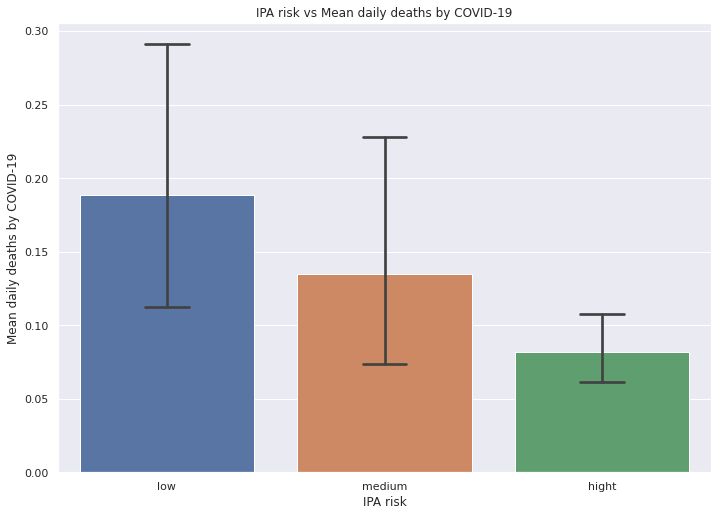

In [58]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot = barplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths,
        x='risk',
        y='mean_daily_deaths',
        capsize=.2,
        estimator=np.mean)

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'IPA_risk_vs_Mean_daily_deaths_by_COVID-19_barplot.png'

plt.title('IPA risk vs Mean daily deaths by COVID-19')
plt.xlabel('IPA risk')
plt.ylabel('Mean daily deaths by COVID-19')

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

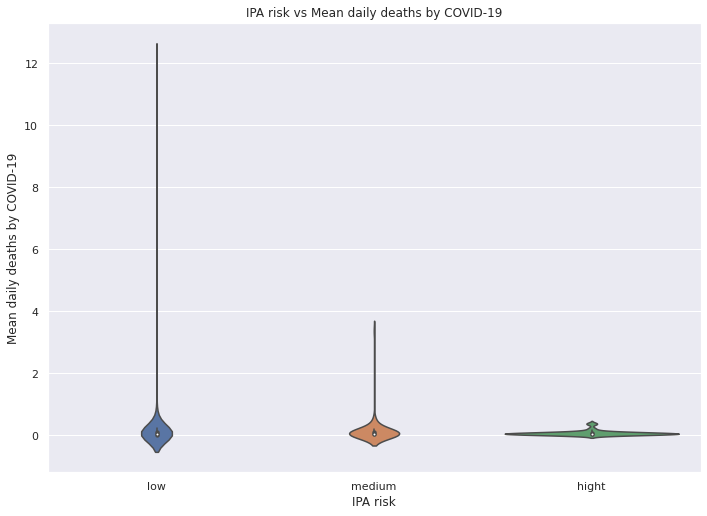

In [342]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme()

plot = violinplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths,
        x='risk',
        y='mean_daily_deaths',
        estimator=np.mean)

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'IPA_risk_vs_Mean_daily_deaths_by_COVID-19_violin_plot.png'

plt.title('IPA risk vs Mean daily deaths by COVID-19')
plt.xlabel('IPA risk')
plt.ylabel('Mean daily deaths by COVID-19')

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

<AxesSubplot:xlabel='risk', ylabel='mean_daily_deaths'>

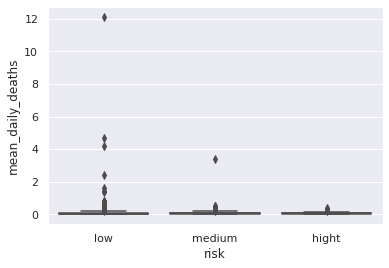

In [333]:
boxplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths,
        x='risk',
        y='mean_daily_deaths')

In [354]:
df_resume = df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.groupby(by=['risk']).agg({
    'mean_daily_deaths': ['mean', 'std', 'max']    
})

df_resume

mean_daily_deaths                     
                    mean       std        max
risk                                         
hight           0.081715  0.079607   0.394052
low             0.188762  0.823057  12.114695
medium          0.134581  0.390219   3.369176

In [357]:
path_output = os.path.join(os.getcwd(), 'output', 'data')
file_output = 'resume_ipa_mean_daily_deaths_by_covid.csv'
df_resume.to_csv(os.path.join(path_output, file_output))

In [134]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.columns

Index(['taxa', 'risk', 'CFC_DEATHS', 'CFC_BEDS', 'regiao', 'CFM',
       'mean_daily_deaths'],
      dtype='object')

In [138]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.groupby(by=['risk']).agg({
    'mean_daily_deaths': ['describe'],
    'CFC_DEATHS': ['describe'],
    'CFC_BEDS': ['describe'],
    'CFM': ['describe']
})

mean_daily_deaths                                                    \
                describe                                                     
                   count      mean       std       min       25%       50%   
risk                                                                         
hight               42.0  0.081715  0.079607  0.000000  0.039762  0.060899   
low                291.0  0.188762  0.823057  0.000000  0.020921  0.046332   
medium              76.0  0.134581  0.390219  0.004082  0.030857  0.060117   

                            CFC_DEATHS            ...  CFC_BEDS            \
                              describe            ...  describe             
             75%        max      count      mean  ...       75%       max   
risk                                              ...                       
hight   0.093684   0.394052       42.0  0.000744  ...  0.001624  0.005559   
low     0.106714  12.114695      291.0  0.000594  ...  0.002250  0.007976   
medium  0.104984   3.369176       76.0  0.000743  ...  0.001625  0.004149   

            CFM                                                              \
       describe                                                               
          count      mean       std       min       25%       50%       75%   
risk                                                                          
hight      42.0  0.398385  0.336693  0.010765  0.162300  0.332710  0.520669   
low       291.0  0.056104  0.091781  0.000352  0.006698  0.021355  0.064862   
medium     76.0  0.225567  0.200801  0.020085  0.094229  0.165832  0.289894   

                  
                  
             max  
risk              
hight   1.716817  
low     0.599316  
medium  1.144007  

[3 rows x 32 columns]

# 9. Check Mean Daily Deaths outside and inside malaria cities

In [95]:
df_mean_daily_deaths = load_datasets.load_mean_daily_deaths_2020()

In [191]:
# df_cfc_2020

'150010'

In [126]:
bol_mean_daily_deaths_outside_mal = ~df_mean_daily_deaths.index.isin(df_ipa_risk_cfc_2020_with_city_duplicate['codmun'])

In [127]:
df_mean_daily_deaths[bol_mean_daily_deaths_outside_mal].describe()

,mean_daily_deaths
count,5022.000000
mean,0.103651
std,0.842730
min,0.000000
25%,0.008511
50%,0.021164
75%,0.057348
max,53.261649


In [128]:
bol_mean_daily_deaths_insideside_mal = df_mean_daily_deaths.index.isin(df_ipa_risk_cfc_2020_no_duplicates_keep_equal_false['codmun'])

In [129]:
df_mean_daily_deaths[bol_mean_daily_deaths_insideside_mal].describe()

,mean_daily_deaths
count,458.000000
mean,0.392358
std,2.917251
min,0.000000
25%,0.024948
50%,0.054394
75%,0.109535
max,56.197133


# 10. Correlation between IPA and CFM

Text(0.5, 1.0, 'spearman correlaction')

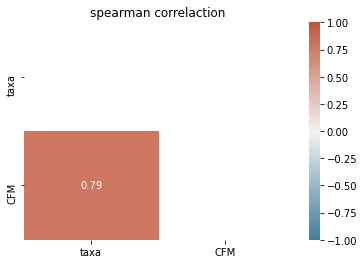

In [20]:
corr = df_ipa_cfc_2020_cfm_all_years[['taxa', 'CFM']].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)
plt.title('spearman correlaction')

# 11. Correlation between mean daily deaths by covid and IPA

In [20]:
df_mean_daily_deaths_covid_2020 = load_datasets.load_mean_daily_deaths_2020()

In [21]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths = df_ipa_cfc_2020_cfm_all_years.join(df_mean_daily_deaths_covid_2020)

NameError: name 'df_ipa_cfc_2020_cfm_all_years' is not defined

In [26]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths

,taxa,risk,CFC_DEATHS,CFC_BEDS,regiao,CFM,mean_daily_deaths
codmun,,,,,,,
150010,0.06,low,0.000761,0.001782,Norte,0.005010,0.434783
150013,0.58,low,0.000269,0.002825,Norte,0.006188,0.008439
150020,0.24,low,0.000288,0.000594,Norte,0.000738,0.060377
120001,4.54,low,0.000787,0.001049,Norte,0.416561,0.043165
150030,24.42,medium,0.000280,0.000765,Norte,0.342044,0.042636
...,...,...,...,...,...,...,...
172210,0.08,low,0.001300,0.002426,Norte,0.015425,0.063559
150840,0.04,low,0.000581,0.002659,Norte,0.010078,0.101562
211400,1.29,low,0.000754,0.001470,Nordeste,0.038442,0.148289


Text(0.5, 1.0, 'spearman correlaction')

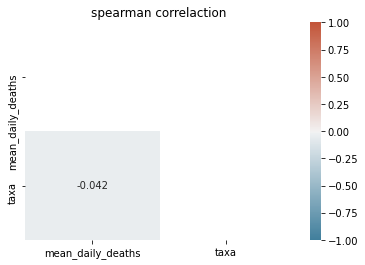

In [27]:
corr = df_ipa_cfc_2020_cfm_2020_mean_daily_deaths[['mean_daily_deaths', 'taxa']].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)
plt.title('spearman correlaction')

#  <center>12. FINAL</center>

In [337]:
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.columns

Index(['taxa', 'risk', 'CFC_DEATHS', 'CFC_BEDS', 'regiao', 'CFM',
       'mean_daily_deaths'],
      dtype='object')

In [243]:
li_operations = ['describe']
li_operations_head = ['count', 'describe']

df_comparison_final = df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.groupby(by=['risk']).agg({    
    'mean_daily_deaths': li_operations_head,
    'CFC_DEATHS': li_operations,
    'CFC_BEDS': li_operations,
    'CFM': li_operations
})

count_column_detected = False
for column in df_comparison_final.columns:
    if 'count' in column:
        if count_column_detected == False:
            df_comparison_final.drop(column, axis=1, inplace=True)
            count_column_detected = True

In [334]:
df_comparison_final

mean_daily_deaths                                                    \
                describe                                                     
                   count      mean       std       min       25%       50%   
risk                                                                         
hight               42.0  0.081715  0.079607  0.000000  0.039762  0.060899   
low                291.0  0.188762  0.823057  0.000000  0.020921  0.046332   
medium              76.0  0.134581  0.390219  0.004082  0.030857  0.060117   

                            CFC_DEATHS            ...  CFC_BEDS            \
                              describe            ...  describe             
             75%        max      count      mean  ...       75%       max   
risk                                              ...                       
hight   0.093684   0.394052       42.0  0.000744  ...  0.001624  0.005559   
low     0.106714  12.114695      291.0  0.000594  ...  0.002250  0.007976   
medium  0.104984   3.369176       76.0  0.000743  ...  0.001625  0.004149   

            CFM                                                              \
       describe                                                               
          count      mean       std       min       25%       50%       75%   
risk                                                                          
hight      42.0  0.398385  0.336693  0.010765  0.162300  0.332710  0.520669   
low       291.0  0.056104  0.091781  0.000352  0.006698  0.021355  0.064862   
medium     76.0  0.225567  0.200801  0.020085  0.094229  0.165832  0.289894   

                  
                  
             max  
risk              
hight   1.716817  
low     0.599316  
medium  1.144007  

[3 rows x 32 columns]

In [338]:
output_path = os.path.join(os.getcwd(), 'output', 'data')
output_file = 'ipa_cfc_2020_cfm_2020_mean_daily_deaths_2020_comparison_final.csv'
df_comparison_final.to_csv(os.path.join(output_path, output_file))

In [246]:
output_path = os.path.join(os.getcwd(), 'output', 'data')
output_file = 'ipa_cfc_2020_cfm_2020_mean_daily_deaths_2020.csv'
df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.to_csv(os.path.join(output_path, output_file))

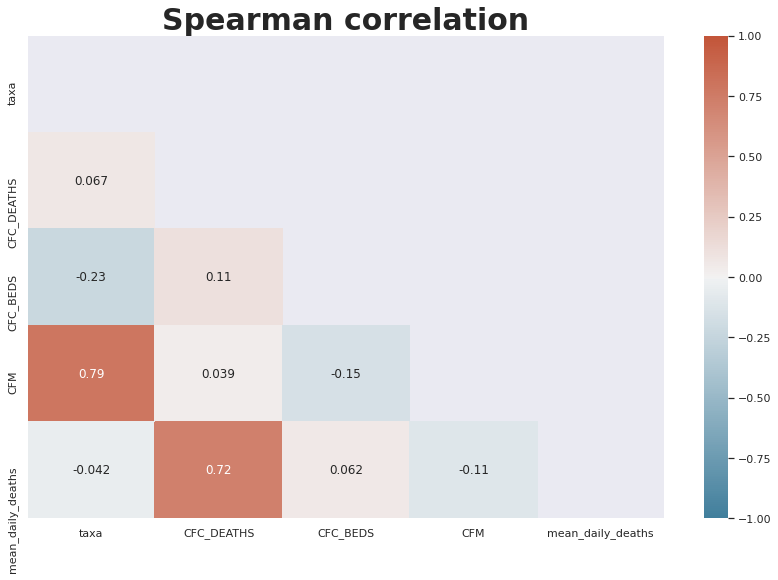

In [122]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'final_correlaction.png'

corr = df_ipa_cfc_2020_cfm_2020_mean_daily_deaths.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plot = sns.heatmap(
    data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)

plt.title("Spearman correlation", fontsize=30, fontweight='bold') 
# plt.tick_params(labelsize=8)
plt.tight_layout()

plt.show()

plot.figure.savefig(os.path.join(path_output, file_output), dpi=300)

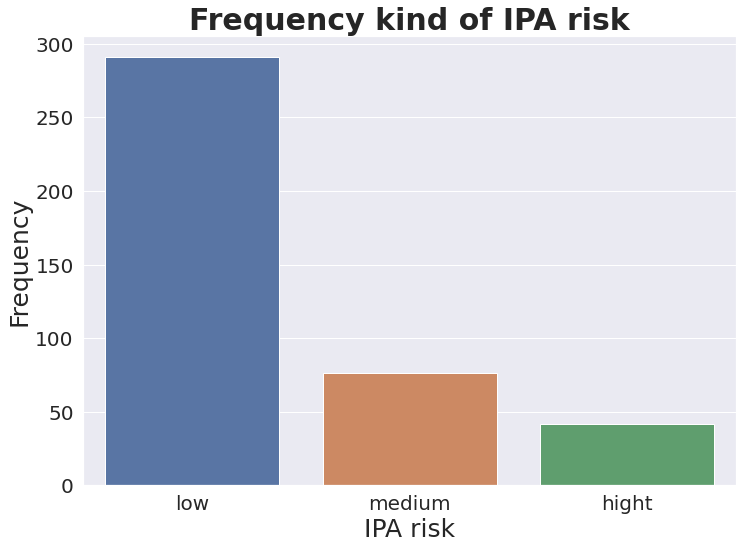

In [86]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})     

plt.tight_layout()

plot = countplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths, x='risk')

plt.title("Frequency kind of IPA risk", fontsize=30, fontweight='bold')
plt.xlabel('IPA risk', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plot.tick_params(labelsize=20)

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'ipa_countplot.png'



plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

<Figure size 842.4x595.44 with 0 Axes>

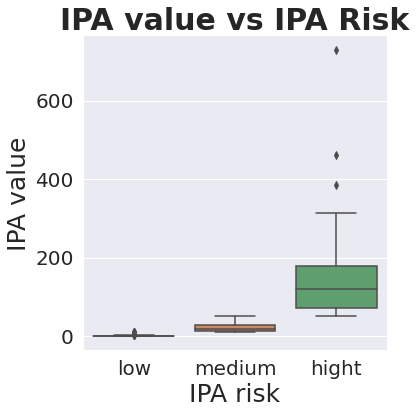

In [91]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.tight_layout()

plot = catplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths[['risk', 'taxa']],
       x='risk', y='taxa', kind='box')

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'ipa_catplot_boxplot.png'

plt.title('IPA value vs IPA Risk', fontsize=30, fontweight='bold')
plt.xlabel('IPA risk', fontsize=25)
plt.ylabel('IPA value', fontsize=25)
plt.tick_params(labelsize=20)

plt.show()

plot.savefig(
    os.path.join(path_output, file_output), dpi=300)

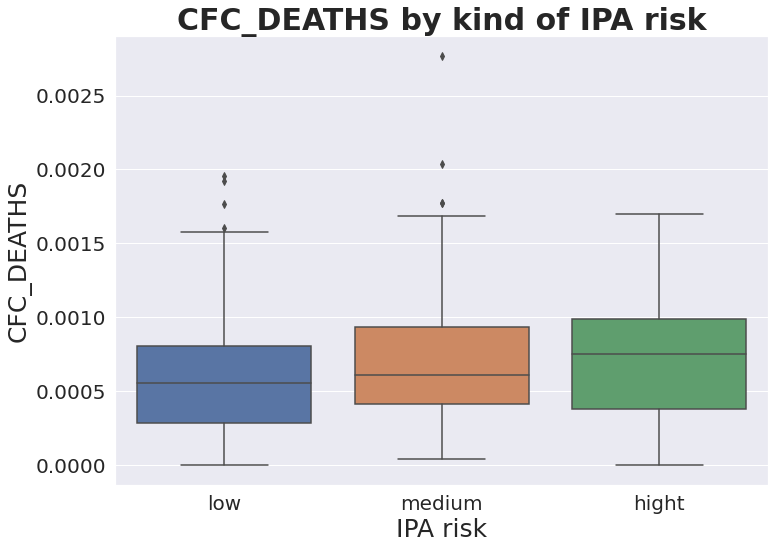

In [102]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.tight_layout()

plot = boxplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths,
        x='risk',
        y='CFC_DEATHS')

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'CFC_DEATHS_by_IPA_risk.png'

plt.title('CFC_DEATHS by kind of IPA risk', fontsize=30, fontweight='bold')
plt.xlabel('IPA risk', fontsize=25)
plt.ylabel('CFC_DEATHS', fontsize=25)
plt.tick_params(labelsize=20)

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

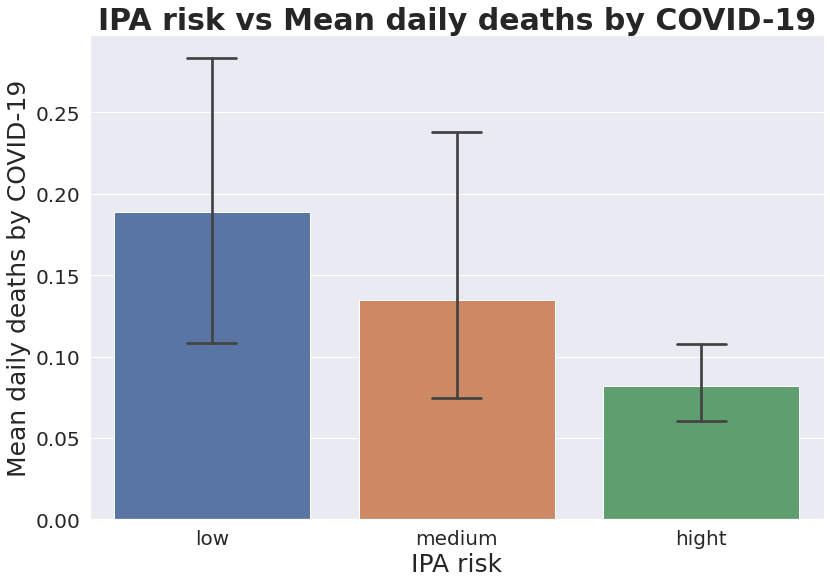

In [103]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot = barplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths,
        x='risk',
        y='mean_daily_deaths',
        capsize=.2,
        estimator=np.mean)

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'IPA_risk_vs_Mean_daily_deaths_by_COVID-19_barplot.png'

plt.title('IPA risk vs Mean daily deaths by COVID-19', fontsize=30, fontweight='bold')
plt.xlabel('IPA risk', fontsize=25)
plt.ylabel('Mean daily deaths by COVID-19', fontsize=25)
plt.tick_params(labelsize=20)
plt.tight_layout()

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

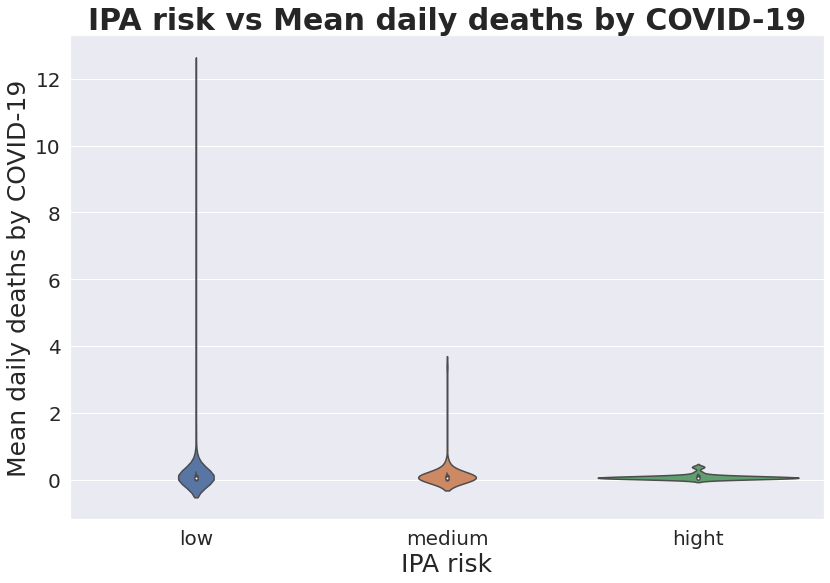

In [105]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme()

plot = violinplot(df_ipa_cfc_2020_cfm_2020_mean_daily_deaths,
        x='risk',
        y='mean_daily_deaths',
        estimator=np.mean)

path_output = os.path.join(os.getcwd(), 'output')
file_output = 'IPA_risk_vs_Mean_daily_deaths_by_COVID-19_violin_plot.png'

plt.title('IPA risk vs Mean daily deaths by COVID-19', fontsize=30, fontweight='bold')
plt.xlabel('IPA risk', fontsize=25)
plt.ylabel('Mean daily deaths by COVID-19', fontsize=25)
plt.tick_params(labelsize=20)
plt.tight_layout()

plt.show()

plot.figure.savefig(
    os.path.join(path_output, file_output), dpi=300)

In [125]:
path_output = os.path.join(os.getcwd(), 'output', 'data')
file_output = 'mean_daily_deaths_2020_describe.csv'

load_datasets.load_mean_daily_deaths_2020().describe().to_csv(os.path.join(
    path_output, file_output))